In [12]:
import pandas as pd
import numpy as np
import datetime as date

In [26]:
users = pd.read_csv('takehome_users.csv',engine='python')
engagement = pd.read_csv('takehome_user_engagement.csv',engine='python')

In [27]:
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [28]:
id_engaged = engagement.groupby('user_id').sum()

In [29]:
id_engaged.describe()

,visited
count,8823.000000
mean,23.565341
std,73.988152
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,606.000000


In [30]:
users = users.rename({'object_id':'user_id'},axis=1)
users.set_index('user_id',inplace=True)

In [31]:
id_engaged['adopted'] = id_engaged.visited>=3
id_engaged.adopted.value_counts()

False    6575
True     2248
Name: adopted, dtype: int64

In [32]:
df = pd.merge(users,id_engaged,left_index=True,right_index=True)

In [33]:
df

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,False
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1,False
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               8823 non-null   object 
 1   name                        8823 non-null   object 
 2   email                       8823 non-null   object 
 3   creation_source             8823 non-null   object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    8823 non-null   int64  
 6   enabled_for_marketing_drip  8823 non-null   int64  
 7   org_id                      8823 non-null   int64  
 8   invited_by_user_id          4776 non-null   float64
 9   visited                     8823 non-null   int64  
 10  adopted                     8823 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 766.8+ KB


In [35]:
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)

In [42]:
df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,14,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,1,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,1,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,1,False


last session creation time don't make sense, dropping columns

In [43]:
df.drop('last_session_creation_time',axis=1,inplace=True)

In [47]:
df.head()

,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,1,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,14,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,1,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,1,False


In [116]:
x = df.drop(['creation_time','name','email','visited','adopted'],axis=1)
y = df.adopted

In [117]:
x

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,
1,GUEST_INVITE,1,0,11,10803.0
2,ORG_INVITE,0,0,1,316.0
3,ORG_INVITE,0,0,94,1525.0
4,GUEST_INVITE,0,0,1,5151.0
5,GUEST_INVITE,0,0,193,5240.0
...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,8263.0
11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN
11998,GUEST_INVITE,1,1,83,8074.0


In [59]:
x.org_id.value_counts()

0      228
1      172
2      150
3      125
4      122
      ... 
322      6
400      6
397      5
386      4
416      2
Name: org_id, Length: 417, dtype: int64

In [60]:
pd.get_dummies(x)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,
1,1,0,11,10803.0,1,0,0,0,0
2,0,0,1,316.0,0,1,0,0,0
3,0,0,94,1525.0,0,1,0,0,0
4,0,0,1,5151.0,1,0,0,0,0
5,0,0,193,5240.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11996,0,0,89,8263.0,0,1,0,0,0
11997,0,0,200,NaN,0,0,0,0,1
11998,1,1,83,8074.0,1,0,0,0,0


In [118]:
#x.org_id = x.org_id.astype('object')
#x.invited_by_user_id = x.invited_by_user_id.astype('object')
x = pd.get_dummies(x)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25)

In [122]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

In [123]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
dt.score(x_test,y_test)

0.6767905711695377

Feature: 0, opted_in_to_mailing_list, Score: 0.08532
Feature: 1, enabled_for_marketing_drip, Score: 0.06174
Feature: 2, org_id, Score: 0.47994
Feature: 3, invited_by_user_id, Score: 0.31669
Feature: 4, creation_source_GUEST_INVITE, Score: 0.01493
Feature: 5, creation_source_ORG_INVITE, Score: 0.00997
Feature: 6, creation_source_PERSONAL_PROJECTS, Score: 0.00607
Feature: 7, creation_source_SIGNUP, Score: 0.01109
Feature: 8, creation_source_SIGNUP_GOOGLE_AUTH, Score: 0.01424


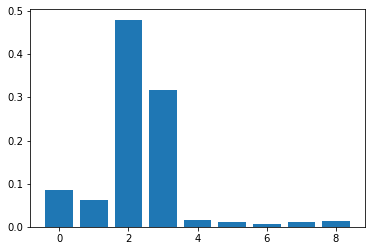

In [125]:
importances = dt.feature_importances_
for i,v in enumerate(importances): 
    print('Feature: '+ str(i) +', '+x_train.columns[i]+', Score: %.5f' % (v))
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [67]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(x,y)

RandomForestClassifier(random_state=10)

In [69]:
rfc.decision_path(x)

(<8823x532624 sparse matrix of type '<class 'numpy.int64'>'
 	with 242954424 stored elements in Compressed Sparse Row format>,
 array([     0,   5323,  10730,  16013,  21222,  26547,  31834,  37033,
         42056,  47471,  52672,  57909,  63066,  68433,  74060,  79231,
         84710,  90105,  95364, 100659, 106112, 111739, 117216, 122513,
        128140, 133197, 138442, 143645, 149144, 154269, 159684, 165205,
        170910, 176393, 181478, 186601, 191994, 197349, 202730, 208107,
        213366, 218791, 224018, 229529, 234822, 240111, 245574, 251117,
        256428, 261759, 267098, 272427, 277864, 283115, 288036, 293349,
        298344, 303589, 308748, 313879, 319084, 324717, 330002, 335777,
        340962, 346313, 351688, 357085, 362178, 367601, 372958, 378193,
        383414, 388861, 394012, 399407, 404646, 410051, 415462, 420843,
        426230, 431671, 436646, 442109, 447512, 452687, 458180, 463433,
        468946, 474215, 479584, 484751, 490022, 495139, 500454, 505583,
        5

Feature: 0, opted_in_to_mailing_list, Score: -0.25700
Feature: 1, enabled_for_marketing_drip, Score: -0.14924
Feature: 2, org_id, Score: 0.00162
Feature: 3, invited_by_user_id, Score: 0.00000
Feature: 4, creation_source_GUEST_INVITE, Score: 0.02495
Feature: 5, creation_source_ORG_INVITE, Score: -0.21254
Feature: 6, creation_source_PERSONAL_PROJECTS, Score: -0.10066
Feature: 7, creation_source_SIGNUP, Score: -0.41297
Feature: 8, creation_source_SIGNUP_GOOGLE_AUTH, Score: -0.31235


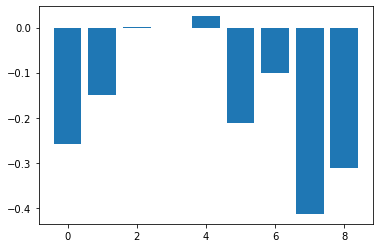

In [112]:
x_cl = df.drop(['creation_time','name','email','visited','adopted'],axis=1)
y_cl = df.adopted

x_cl = pd.get_dummies(x_cl)

x_cl = x_cl.fillna(0)

import matplotlib.pyplot as plt
x_cl_train,x_cl_test,y_cl_train,y_cl_test = train_test_split(x_cl,y_cl,test_size=.3)
lr = LogisticRegression()
lr.fit(x_cl_train,y_cl_train)
importance = lr.coef_[0]
for i,v in enumerate(importance): 
    print('Feature: '+ str(i) +', '+x_cl.columns[i]+', Score: %.5f' % (v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [105]:
x_cl.iloc[:,[6]]

,creation_source_PERSONAL_PROJECTS
user_id,
1,0
2,0
3,0
4,0
5,0
...,...
11996,0
11997,0
11998,0


3 most important features

In [104]:
x_cl.iloc[:,[5,7,8]]

,creation_source_ORG_INVITE,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
5,0,0,0
...,...,...,...
11996,1,0,0
11997,0,0,1
11998,0,0,0
